# Compressed Sensing

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pylab

In [2]:
pylab.rcParams['figure.figsize'] = (14.0, 8.0)

In [3]:
n_samples = 128 # full sample size
n_peaks = 5 # number of peaks
n_subsamples = 32 # subsample size

In [4]:
def fftc(x):
    
    return 1 / np.sqrt(x.size) * np.fft.fftshift(np.fft.fft(np.fft.ifftshift(x)))

def ifftc(x):

    return np.sqrt(x.size) * np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(x)))

In [5]:
def stem_plot(data, title, imag=False):
        
    (markers, stemlines, baseline) = plt.stem(np.real(data), label='Real')
    plt.setp(stemlines, linestyle="-", color="grey", linewidth=0.5 )
    plt.setp(markers, marker='o', color="#19C3F5")
    plt.setp(baseline, linestyle="--", color="grey", linewidth=2)

    if imag:

        (markers, stemlines, baseline) = plt.stem(np.imag(data), label='Imaginary')
        plt.setp(stemlines, linestyle="-", color="grey", linewidth=0.5 )
        plt.setp(markers, marker='o', color="#EA8663")
        plt.setp(baseline, linestyle="--", color="grey", linewidth=2)
        plt.legend()
        
    plt.title(title, fontsize=20)
    plt.show()

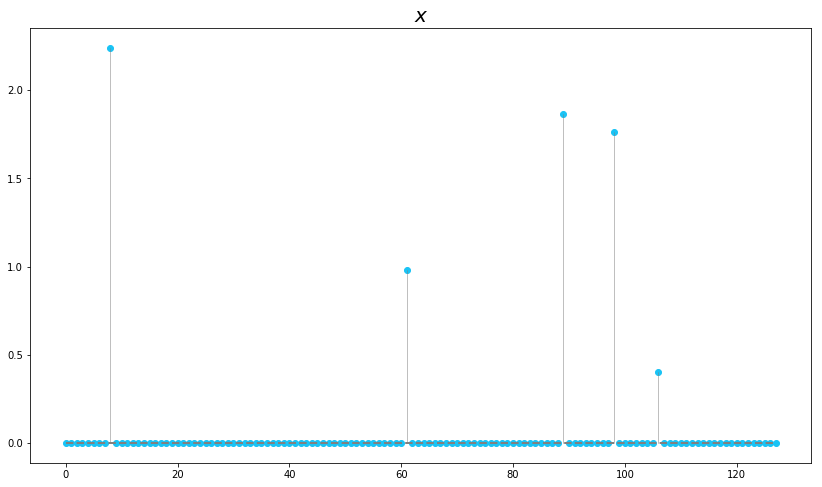

In [6]:
np.random.seed(0)

x = np.zeros(n_samples)
x[np.random.permutation(n_samples)[:n_peaks]] = np.random.randn(n_peaks)

stem_plot(x, r'$x$')

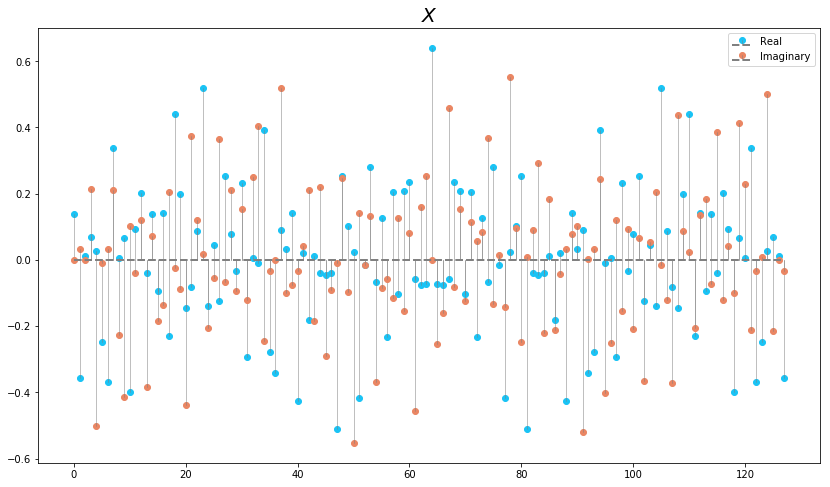

In [7]:
X = fftc(x)

stem_plot(X, r'$X$', imag=True)

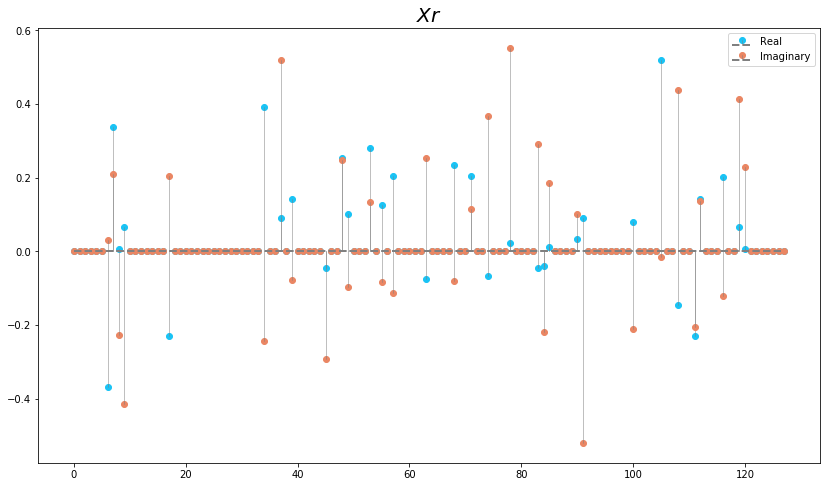

In [8]:
Xr = np.zeros(n_samples).astype(complex)
prm = np.random.permutation(n_samples)[:n_subsamples]
Xr[prm[:n_subsamples]] = X[prm][:n_subsamples]

stem_plot(Xr, r'$Xr$', imag=True)

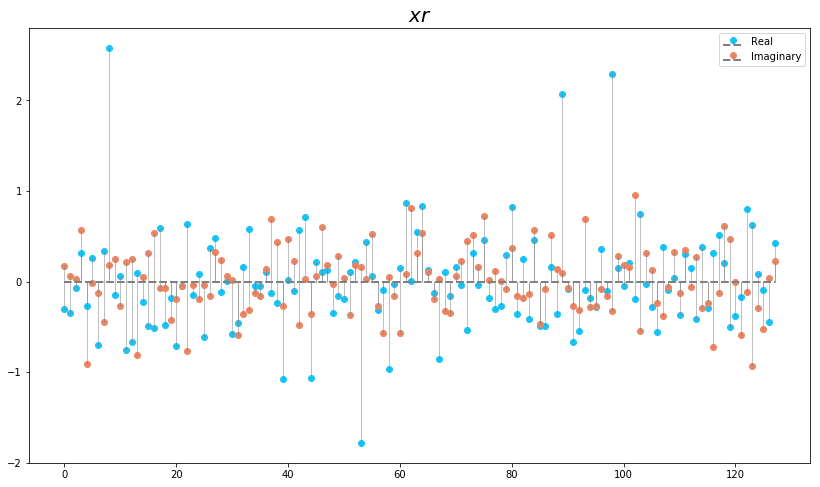

In [9]:
xr = ifftc(Xr) * 4

stem_plot(xr, r'$xr$', imag=True)

In [10]:
def soft_thresh(data, threshold):
    
    return np.around(np.maximum((1.0 - threshold /
                             np.maximum(np.finfo(np.float64).eps, np.abs(data))),
                             0.0) * data, decimals=15)

In [11]:
def pocs(y_obs, x_init, lambda_thresh, n_iter=300):
    
    for i in range(n_iter):
        x_iter = soft_thresh(ifftc(x_init), lambda_thresh)
        x_init = fftc(x_iter) * (y_obs == 0) + y_obs 
                
    return x_iter

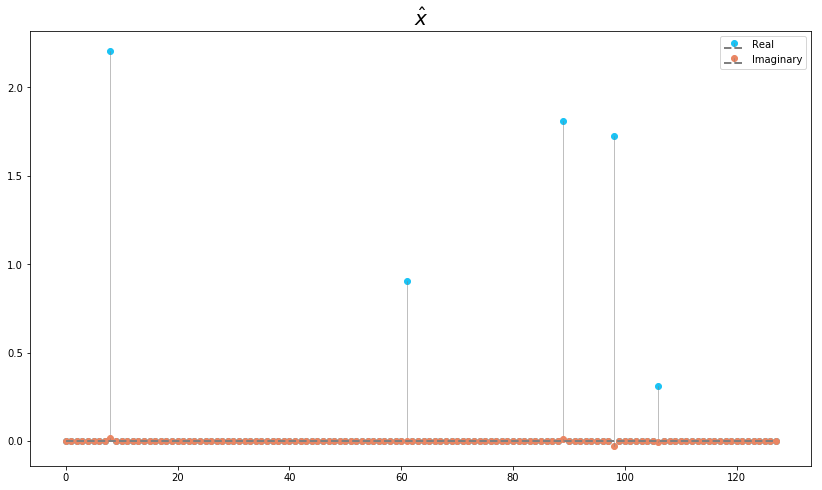

In [12]:
Y = Xr

x_new = pocs(Y, Y, 0.01)

stem_plot(x_new, r'$\hat{x}$', imag=True)